#### A Recommender System for the MovieLens Dataset 

#### 1. IMPORT THE BASIC LIBRARIES 

In [1]:
import pandas as pd
import numpy as np

#### IMPORTING OUR DATA 

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

##### creating a subset of our data 

In [4]:
movie_df = movies[['id','title','vote_average']].rename(columns={'':'Revenue Per Product'})

In [10]:
column_names = ['user_id','item_id','rating','time_stamp']


In [25]:
df = pd.read_csv('u.data', sep='\t',names=column_names)

In [26]:
df.head()


,user_id,item_id,rating,time_stamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [27]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [28]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Merging our data 

In [31]:
df = pd.merge(df,movie_titles,on='item_id')
df.head(5)

,user_id,item_id,rating,time_stamp,title_x,title_y,title
0,0,50,5,881250949,Star Wars (1977),Star Wars (1977),Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977),Star Wars (1977),Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977),Star Wars (1977),Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977),Star Wars (1977),Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977),Star Wars (1977),Star Wars (1977)


In [32]:
df = df[['user_id','item_id','rating','time_stamp','title']]
df.head()

,user_id,item_id,rating,time_stamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


#### EXPLORATORY DATA ANALYSIS

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline 

In [40]:
df.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

since many movies have 5.0 ratings we know it is kind of biased because we didn't account for the number of ratings, we can do that by accounting for the number of ratings then adding a threshold

In [61]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

creating a dataframe for Ratings 

In [64]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()
ratings = ratings.rename(columns={'rating':'mean_rating'})
ratings.head()

,mean_rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [67]:
ratings['count'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()


,mean_rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### CHECKING THE DISTRIBUTION OF OUR NUMBER OF RATINGS COLUMN 

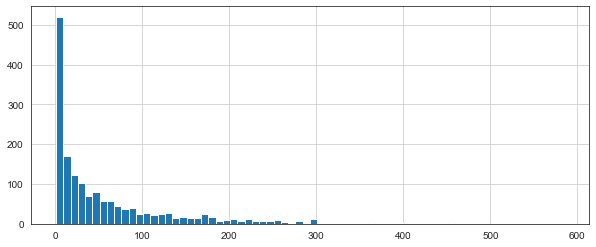

In [68]:
plt.figure(figsize=(10,4))
ratings['count'].hist(bins=70)

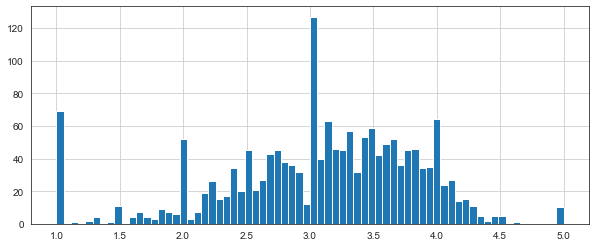

In [69]:
plt.figure(figsize=(10,4))
ratings['mean_rating'].hist(bins=70)

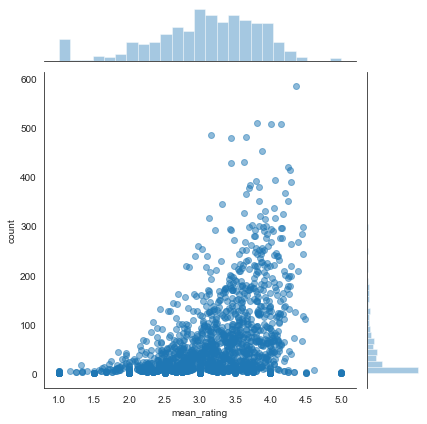

In [70]:
sns.jointplot(x = 'mean_rating', y = 'count',data=ratings,alpha = 0.5)

In [81]:
#df['user_id'].count()

#### RECOMMENDING SIMILAR MOVIES 

In [82]:
moviesmat = df.pivot_table(index='user_id',columns='title',values='rating')
moviesmat.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
type(moviesmat)

pandas.core.frame.DataFrame

In [84]:
ratings.head()

,mean_rating,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [87]:
ratings.sort_values('count', ascending=False).head()


,mean_rating,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


##### grab user ratings for Star wars and Fargo movies 

In [110]:
starwars_user_ratings = moviesmat['Star Wars (1977)']
fargo_user_ratings = moviesmat['Fargo (1996)']

In [112]:
fargo_user_ratings.head()
starwars_user_ratings.head()


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

#### correlating with the moviesmat data set . We are going to use the corrwith method on pandas. This is for correlating two dataframes.


In [113]:
similar_to_star_wars = pd.DataFrame(moviesmat.corrwith(starwars_user_ratings),columns=["Correlation"])
#similar_to_star_wars.dropna(inplace=True)
similar_to_fargo = pd.DataFrame(moviesmat.corrwith(fargo_user_ratings),columns=["Correlation"])
#similar_to_fargo.dropna(inplace=True)


C:\Users\Mac\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Mac\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [115]:
similar_to_star_wars = similar_to_star_wars.join(ratings['count'])

we have a problem with the amount of numbers that are in perfect correlation with starwars and fargo movies. We can correct this by selecting only the movies that have been rated a certain number of times 

In [117]:
similar_to_star_wars.head()

,Correlation,count
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [118]:
#### PUTTING A THRESHOLD FOR OUR NUMBER OF RATINGS PER MOVIE

In [127]:
similar_to_star_wars[similar_to_star_wars['count'] >= 50].sort_values('Correlation',ascending=False)
similar_to_star_wars.head()

,Correlation,count
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [137]:
similar_to_fargo = similar_to_fargo[similar_to_fargo['count']>50].sort_values('Correlation',ascending=False)
